In [6]:
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
#
mu = np.array([0, 0])
sigma = np.array([[1, 0.9], [0.9, 1]])

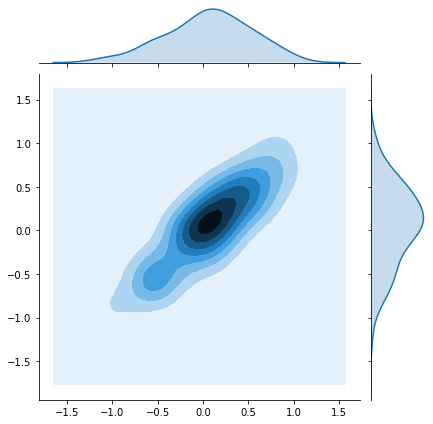

In [10]:
#多元正态分布相关公式
#https://blog.csdn.net/omade/article/details/28408663
class Gibbs:
    def __init__(self, num):
        self.iter = num
        self.mu = None
        self.sigma = None
    
    def fit(self, mu, sigma):
        #算法19.3
        self.mu = mu
        self.sigma = sigma
        
        samples = np.zeros((self.iter, 2)) #采样结果
        
        #初始化
        x1 = np.random.random()
        x2 = np.random.random()
        
        for i in range(self.iter):
            x1 = self.x1_sample(x2)
            x2 = self.x2_sample(x1)
            
            samples[i, :] = [x1, x2]
            
        return samples
            
    
    def x1_sample(self, x):
        #已知x2求x1
        mu = self.mu[0] + (self.sigma[0, 1] / self.sigma[1, 1]) * (x - self.mu[1])
        sigma  = self.sigma[0, 0] - np.square(self.sigma[0, 1]) / self.sigma[1, 1]
        return np.random.normal(mu, sigma)
    
    def x2_sample(self, x):
        #已知x1求x2
        mu = self.mu[1] + (self.sigma[0, 1] / self.sigma[0, 0]) * (x - self.mu[1])
        sigma  = self.sigma[1, 1] - np.square(self.sigma[0, 1]) / self.sigma[0, 0]
        return np.random.normal(mu, sigma)
    
sampling = Gibbs(100)
samples = sampling.fit(mu, sigma)

sns.jointplot(samples[:, 0], samples[:, 1], kind="kde")
        